# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [93]:
#Load the dataset and explore its variables
df = pd.read_csv('./snsdata.csv')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [94]:
# revisamos la estructura del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [95]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [96]:
# dado que el dataset es relacioniados a estudiantes de secundaria rellenaremos los datos faltantes de edad
# con el promedio de las edades de los estudiantes
df.age = df.age.fillna(df.age.mean())
df.age.isna().sum()

0

In [97]:
# redondemoas las edades para poder categorizarlas aducuadamente
df.age = np.floor(df.age).astype('int64')

In [98]:
# Los nullos en genero los eliminamos
df = df.dropna(subset=['gender'],axis=0)

In [99]:
df.shape

(27276, 40)

In [124]:
# etiquetamos las variables categoricas
# df.gradyear = df.gradyear.astype('category')
# df.gender = df.gender.astype('category')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27276 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gradyear      27276 non-null  int64 
 1   gender        27276 non-null  object
 2   age           27276 non-null  int64 
 3   friends       27276 non-null  int64 
 4   basketball    27276 non-null  int64 
 5   football      27276 non-null  int64 
 6   soccer        27276 non-null  int64 
 7   softball      27276 non-null  int64 
 8   volleyball    27276 non-null  int64 
 9   swimming      27276 non-null  int64 
 10  cheerleading  27276 non-null  int64 
 11  baseball      27276 non-null  int64 
 12  tennis        27276 non-null  int64 
 13  sports        27276 non-null  int64 
 14  cute          27276 non-null  int64 
 15  sex           27276 non-null  int64 
 16  sexy          27276 non-null  int64 
 17  hot           27276 non-null  int64 
 18  kissed        27276 non-null  int64 
 19  danc

## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

In [101]:
#Your code here:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000
mean,2007.505206,17.402112,30.582967,0.276763,0.262758,0.227306,0.168316,0.147309,0.137557,0.108410,0.109364,0.088063,0.146319,0.329887,0.216307,0.144669,0.131324,0.106394,0.432505,0.309796,0.042235,0.757259,0.251686,0.474996,0.255829,0.113653,0.021961,0.434888,0.114056,0.102838,0.261512,0.362883,0.152075,0.070502,0.052280,0.186611,0.118602,0.090592,0.063169
std,1.117616,7.154802,36.650672,0.817537,0.719247,0.924832,0.757396,0.655572,0.522558,0.518209,0.533627,0.515443,0.482623,0.811143,1.160009,0.535902,0.488234,0.518096,1.175783,1.146408,0.294112,1.205515,0.734914,1.356114,0.852082,0.590349,0.209390,1.119306,0.454499,2.034393,0.700965,0.732841,0.478050,0.349593,0.282807,0.613211,0.448373,0.405152,0.355352
min,2006.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,16.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,17.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,18.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.000000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,27.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [102]:
# dado que se trata de un dataset de estudicantes de secundaria evientenemente tenemos outliers en el campo de edad
# iniciaremos eliminando estos outliers
q1 = df.age.quantile(.25)
q3 = df.age.quantile(.75)
iqr = q3 - q1
min = q1 - (iqr*3)
max = q1 + (iqr*3)
print(min)
print(max)

10.0
22.0


In [103]:
# eliminamos outliers
index = df[(df.age <= min)|(df.age >= max)].index
df.drop(index, inplace=True)
df.describe()

C:\Users\lgutierrez\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,2007.503504,16.799244,30.635932,0.277870,0.263968,0.227190,0.169466,0.147666,0.137656,0.109183,0.109888,0.087829,0.146665,0.330849,0.216587,0.144886,0.131687,0.106773,0.433915,0.310014,0.042339,0.758166,0.251066,0.474882,0.255181,0.113039,0.021985,0.435806,0.114856,0.102881,0.262336,0.364883,0.152597,0.070626,0.052497,0.186446,0.118971,0.090757,0.063211
std,1.117402,1.134966,36.692208,0.819466,0.720367,0.925799,0.760082,0.656673,0.523151,0.520507,0.535631,0.515118,0.482136,0.813270,1.164612,0.536098,0.489329,0.519189,1.179429,1.147663,0.294649,1.205915,0.733961,1.358293,0.845173,0.587399,0.209867,1.120669,0.456314,2.045126,0.702259,0.735047,0.479055,0.350338,0.283622,0.613971,0.449563,0.405903,0.355734
min,2006.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,16.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,17.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,18.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,21.000000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,27.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [134]:
# convertimos la edad en categorica
# df.age = df.age.astype('category')

In [104]:
df.shape

(26973, 40)

In [105]:
# Identificaremos grupos de datos para segmentar el dataset
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [106]:
# el dataset contiene daos de diferntes tipos por lo que se pueden generar diferentes grupos
generals=['gradyear', 'gender', 'age', 'friends']
sports=['basketball', 'football','soccer', 'softball', 'volleyball', 'swimming', 'cheerleading','baseball','tennis', 'sports']
personality=['cute', 'sex', 'sexy', 'hot', 'kissed']
music=['dance', 'band', 'marching', 'music', 'rock']
religion=['god', 'church', 'jesus','bible']
sstyle=['hair', 'dress', 'blonde']
clothes=['mall', 'shopping', 'clothes','hollister', 'abercrombie']
warnings=['die', 'death', 'drunk', 'drugs']

In [107]:
# Your comment here
def heat_map(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15,8))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(ax=ax, data=corr, annot=True, cmap='Pastel1_r', mask=mask)
    plt.show()

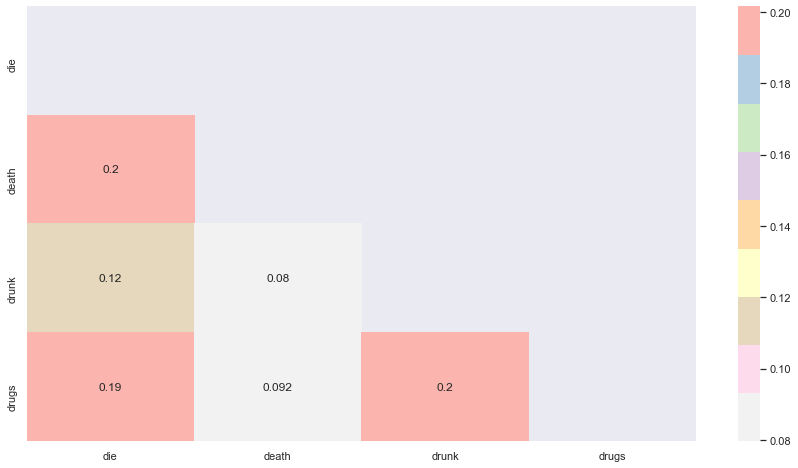

In [108]:
# analicemos correlaciones por tipos de datos
heat_map(df[warnings])

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [109]:
df.shape

(26973, 40)

In [110]:
# dado que el dataset abarca diversos tipos de información elegimos utilzar el relacionado al que muestra
# los estudiantes que han mencionado muerte, morir, alcohol y drogas
cols = ['gradyear', 'gender', 'age', 'friends','die', 'death', 'drunk', 'drugs']
df_warn = df[cols]
df_warn

,gradyear,gender,age,friends,die,death,drunk,drugs
0,2006,M,18,7,0,0,0,0
1,2006,F,18,0,0,0,0,0
2,2006,M,18,69,0,1,0,0
3,2006,F,18,0,0,0,0,0
5,2006,F,17,142,0,0,1,0
...,...,...,...,...,...,...,...,...
29995,2009,M,16,0,0,0,0,0
29996,2009,M,15,1,0,0,0,0
29997,2009,M,15,0,0,0,0,0
29998,2009,M,16,0,0,0,0,0


In [111]:
df_warn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26973 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gradyear  26973 non-null  int64 
 1   gender    26973 non-null  object
 2   age       26973 non-null  int64 
 3   friends   26973 non-null  int64 
 4   die       26973 non-null  int64 
 5   death     26973 non-null  int64 
 6   drunk     26973 non-null  int64 
 7   drugs     26973 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.9+ MB


In [114]:
# transformamos la variable genero a dummie
df_dummy = df.join(pd.get_dummies(df_warn['gender']))

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,F,M
0,2006,M,18,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2006,F,18,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0
2,2006,M,18,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2006,F,18,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,2006,F,17,142,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29996,2009,M,15,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29997,2009,M,15,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29998,2009,M,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
# 2 - Any Categorical data to convert? - Channel and Region
# df_warn.gradyear = df_warn.gradyear.astype('category')
# df_warn.gender = df_warn.gender.astype('category')
# df_warn.age = df_warn.age.astype('category')
# df_warn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29667 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gradyear  29667 non-null  category
 1   gender    29667 non-null  category
 2   age       29667 non-null  category
 3   friends   29667 non-null  int64   
 4   die       29667 non-null  int64   
 5   death     29667 non-null  int64   
 6   drunk     29667 non-null  int64   
 7   drugs     29667 non-null  int64   
dtypes: category(3), int64(5)
memory usage: 1.4 MB


In [39]:
# Your comment here
def scatter_plot(df, col1, col2, col3=None):
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_title(col1 +' vs '+ col2)
    sns.scatterplot(ax=ax, data=df, x=col1, y=col2, hue=col3, palette="deep")
    plt.show();

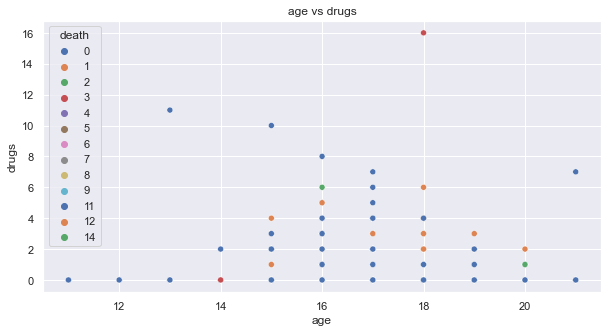

In [40]:
# revisemos la distribución de algunas variables importantes
scatter_plot(df_warn,'age','drugs','death')

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

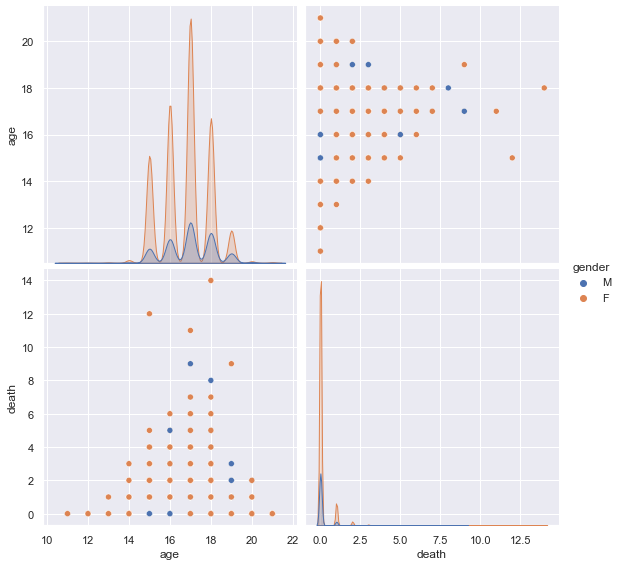

In [124]:
sns.pairplot(data=df_warn, vars=['age','death'], hue='gender', height=4, kind='scatter');

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [126]:
# Scalamos las variables para estandarizar parametros
df_scaled = StandardScaler().fit_transform(df_warn.drop('gender', axis=1))
df_scaled

array([[-1.34555946,  1.05798666, -0.64417956, ..., -0.26464161,
        -0.22359818, -0.17769586],
       [-1.34555946,  1.05798666, -0.83495929, ..., -0.26464161,
        -0.22359818, -0.17769586],
       [-1.34555946,  1.05798666,  1.04558381, ...,  1.95978287,
        -0.22359818, -0.17769586],
       ...,
       [ 1.33928855, -1.58531403, -0.83495929, ..., -0.26464161,
        -0.22359818, -0.17769586],
       [ 1.33928855, -0.7042138 , -0.83495929, ..., -0.26464161,
        -0.22359818, -0.17769586],
       [ 1.33928855,  1.05798666, -0.75319655, ..., -0.26464161,
        -0.22359818, -0.17769586]])

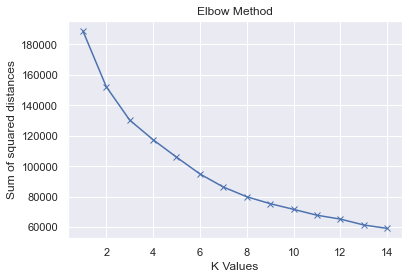

In [127]:
# utilizaremos el metodo del codo (Elbow) para identificar número adecuado de posibles clústers
K = range(1,15)
sum_of_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(df_scaled)
  sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method")
plt.show()

In [144]:
# generamos el model KMeans
df_warnings = df_warn.copy()
kmeans = KMeans(n_clusters=4, random_state=111)
df_clusters = kmeans.fit(df_scaled)
df_centers = df_clusters.cluster_centers_
df_predics = df_clusters.fit_predict(df_scaled)
df_warnings['km_clusters'] = km_predics
df_warnings


,gradyear,gender,age,friends,die,death,drunk,drugs,km_clusters
0,2006,M,18,7,0,0,0,0,1
1,2006,F,18,0,0,0,0,0,1
2,2006,M,18,69,0,1,0,0,5
3,2006,F,18,0,0,0,0,0,1
5,2006,F,17,142,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
29995,2009,M,16,0,0,0,0,0,4
29996,2009,M,15,1,0,0,0,0,4
29997,2009,M,15,0,0,0,0,0,4
29998,2009,M,16,0,0,0,0,0,4


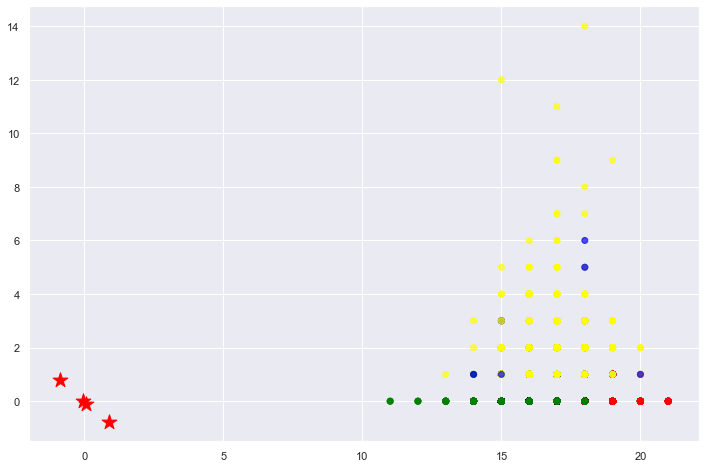

In [146]:
X = df_warnings[['age','death']].to_numpy()
labels = df_predics
center = df_centers
colors = ['yellow','red','blue','green']
clust_col=[]
for row in labels:
  clust_col.append(colors[row])

plt.figure(figsize=(12,8))
feature_1 = X[:,0]
feature_2 = X[:,1]
plt.scatter(feature_1, feature_2, c=clust_col, alpha=.7)
plt.scatter(center[:,0], center[:,1], marker="*", c='red', s=240)
plt.show;